# Maps of maize landuse 
This program is used to plot historical land use including rainfed and irragated land use

In [1]:
# Ignore warnings
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter('ignore')

#Process data    
import numpy as np
import xarray as xr

#Display data 
import cartopy
import cartopy.crs as ccrs
from cartopy.mpl.geoaxes import GeoAxes
from cartopy.vector_transform import vector_scalar_to_grid
from matplotlib.axes import Axes
import cartopy.feature as cfeature
from cartopy import config
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
from mpl_toolkits.axes_grid1 import AxesGrid
import matplotlib.image as image
import matplotlib.pyplot as plt

#Writing data files
import pandas as pd

In [2]:
min_lon = -100 
min_lat = 35
max_lon = -70
max_lat = 65
min_time=334  #1995
max_time=353  #2014


#cropped_ds = ds.sel(lat=slice(min_lat,max_lat), lon=slice(min_lon,max_lon))

In [3]:
#this file was downloaded from:https://data.isimip.org/files/edbdc287-e678-45ef-942f-137327dba6fa/
fn1 = '/media/Data1/Climada/ISIMIP/data/landuse-15crops_2015soc_annual_1850_2014.nc'
ds0=xr.open_dataset(fn1,decode_times=False)
ds0

<xarray.Dataset>
Dimensions:                        (time: 165, lon: 720, lat: 360)
Coordinates:
  * time                           (time) float64 189.0 190.0 ... 352.0 353.0
  * lon                            (lon) float64 -179.8 -179.2 ... 179.2 179.8
  * lat                            (lat) float64 89.75 89.25 ... -89.25 -89.75
Data variables: (12/31)
    c3per_irrigated                (time, lat, lon) float32 ...
    c3per_rainfed                  (time, lat, lon) float32 ...
    c4per_irrigated                (time, lat, lon) float32 ...
    c4per_rainfed                  (time, lat, lon) float32 ...
    maize_irrigated                (time, lat, lon) float32 ...
    maize_rainfed                  (time, lat, lon) float32 ...
    ...                             ...
    temperate_roots_irrigated      (time, lat, lon) float32 ...
    temperate_roots_rainfed        (time, lat, lon) float32 ...
    tropical_cereals_irrigated     (time, lat, lon) float32 ...
    tropical_cereals_rainfed       (time, lat, lon) float32 ...
    tropical_roots_irrigated       (time, lat, lon) float32 ...
    tropical_roots_rainfed         (time, lat, lon) float32 ...
Attributes:
    source:            Based on LUH2 v2h and Global Harvested Area for 175 crops
    institution:       Potsdam Institute for Climate Impact Research
    references:        Frieler et al., Geosci. Model Dev. Discuss., doi:10.51...
    comment:           LUH2 functional crop types disaggregated to 15 ISIMIP ...
    further_info_url:  http://www.isimip.org
    title:             ISIMIP2a ext historical land-use dataset
    contact:           info@isimip.org

In [4]:
# 35-65N, 100W-70W, 1995-2014 
ds=ds0.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),time=slice(min_time,max_time))
ds2000=ds0.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),time=slice(339,339))
ds2005=ds0.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),time=slice(344,344))
ds2010=ds0.sel(lat=slice(max_lat,min_lat), lon=slice(min_lon,max_lon),time=slice(349,349))

In [5]:
ds

<xarray.Dataset>
Dimensions:                        (time: 20, lon: 60, lat: 60)
Coordinates:
  * time                           (time) float64 334.0 335.0 ... 352.0 353.0
  * lon                            (lon) float64 -99.75 -99.25 ... -70.75 -70.25
  * lat                            (lat) float64 64.75 64.25 ... 35.75 35.25
Data variables: (12/31)
    c3per_irrigated                (time, lat, lon) float32 ...
    c3per_rainfed                  (time, lat, lon) float32 ...
    c4per_irrigated                (time, lat, lon) float32 ...
    c4per_rainfed                  (time, lat, lon) float32 ...
    maize_irrigated                (time, lat, lon) float32 ...
    maize_rainfed                  (time, lat, lon) float32 ...
    ...                             ...
    temperate_roots_irrigated      (time, lat, lon) float32 ...
    temperate_roots_rainfed        (time, lat, lon) float32 ...
    tropical_cereals_irrigated     (time, lat, lon) float32 ...
    tropical_cereals_rainfed       (time, lat, lon) float32 ...
    tropical_roots_irrigated       (time, lat, lon) float32 ...
    tropical_roots_rainfed         (time, lat, lon) float32 ...
Attributes:
    source:            Based on LUH2 v2h and Global Harvested Area for 175 crops
    institution:       Potsdam Institute for Climate Impact Research
    references:        Frieler et al., Geosci. Model Dev. Discuss., doi:10.51...
    comment:           LUH2 functional crop types disaggregated to 15 ISIMIP ...
    further_info_url:  http://www.isimip.org
    title:             ISIMIP2a ext historical land-use dataset
    contact:           info@isimip.org

In [6]:
maize_rainfed_landuse_in_percentage_1995to2014 = ds["maize_rainfed"].mean(dim='time')*100
maize_irrigated_landuse_in_percentage_1995to2014 = ds["maize_irrigated"].mean(dim='time')*100

maize_rainfed_landuse_in_percentage_2000 = ds2000["maize_rainfed"].mean(dim='time')*100
maize_irrigated_landuse_in_percentage_2000 = ds2000["maize_irrigated"].mean(dim='time')*100

maize_rainfed_landuse_in_percentage_2005 = ds2005["maize_rainfed"].mean(dim='time')*100
maize_irrigated_landuse_in_percentage_2005 = ds2005["maize_irrigated"].mean(dim='time')*100

maize_rainfed_landuse_in_percentage_2010 = ds2010["maize_rainfed"].mean(dim='time')*100
maize_irrigated_landuse_in_percentage_2010 = ds2010["maize_irrigated"].mean(dim='time')*100


In [7]:
maize_rainfed_landuse_in_percentage_1995to2014

<xarray.DataArray 'maize_rainfed' (lat: 60, lon: 60)>
array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.08666141, 0.03689309, 0.26638758, ...,        nan,        nan,
               nan],
       [0.01648185, 0.13269255, 0.23119052, ...,        nan,        nan,
               nan],
       [0.02874761, 0.07127185, 0.17449498, ...,        nan,        nan,
               nan]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -99.75 -99.25 -98.75 -98.25 ... -71.25 -70.75 -70.25
  * lat      (lat) float64 64.75 64.25 63.75 63.25 ... 36.75 36.25 35.75 35.25

In [8]:
provinces= ['Ontario', 'Quebec','Manitoba','Wisconsin','Vermont','Nebraska','New York','Kansas','Illinois',
            'Delaware','Connecticut','Indiana','Missouri','Michigan','New Jersey','Kentucky','Minnesota',
            'Ohio','Iowa','Pennsylvania','Maryland','Virginia','West Virginia','North Dakota','South Dakota','Nunavut']
provinces1=['ON','QC','MB','WI','VT','NE','NY','KS','IL','DE','CT','IN','MO','MI','NJ','KY','MN','OH','IA','PA','MD','VA','WV','ND','SD','NU']
Latitudes= [50,53,56.4,44.5,44,41.5,43,38.5,40,39,41.6,40.3,38.6,44.2,39.8,37.8,46.4,
            40.4,42,41.2,39,38,39,47.7,44.5,62]
Longitudes=[-85,-76,-98.7,-89.5,-72,-100,-75,-98,-89,-73.5,-72.7,-86,-92.6,-84.5,-74.9,-84.3,-94.6,
            -83,-93.6,-77.2,-76.6,-78,-80.5,-99,-99,-98]

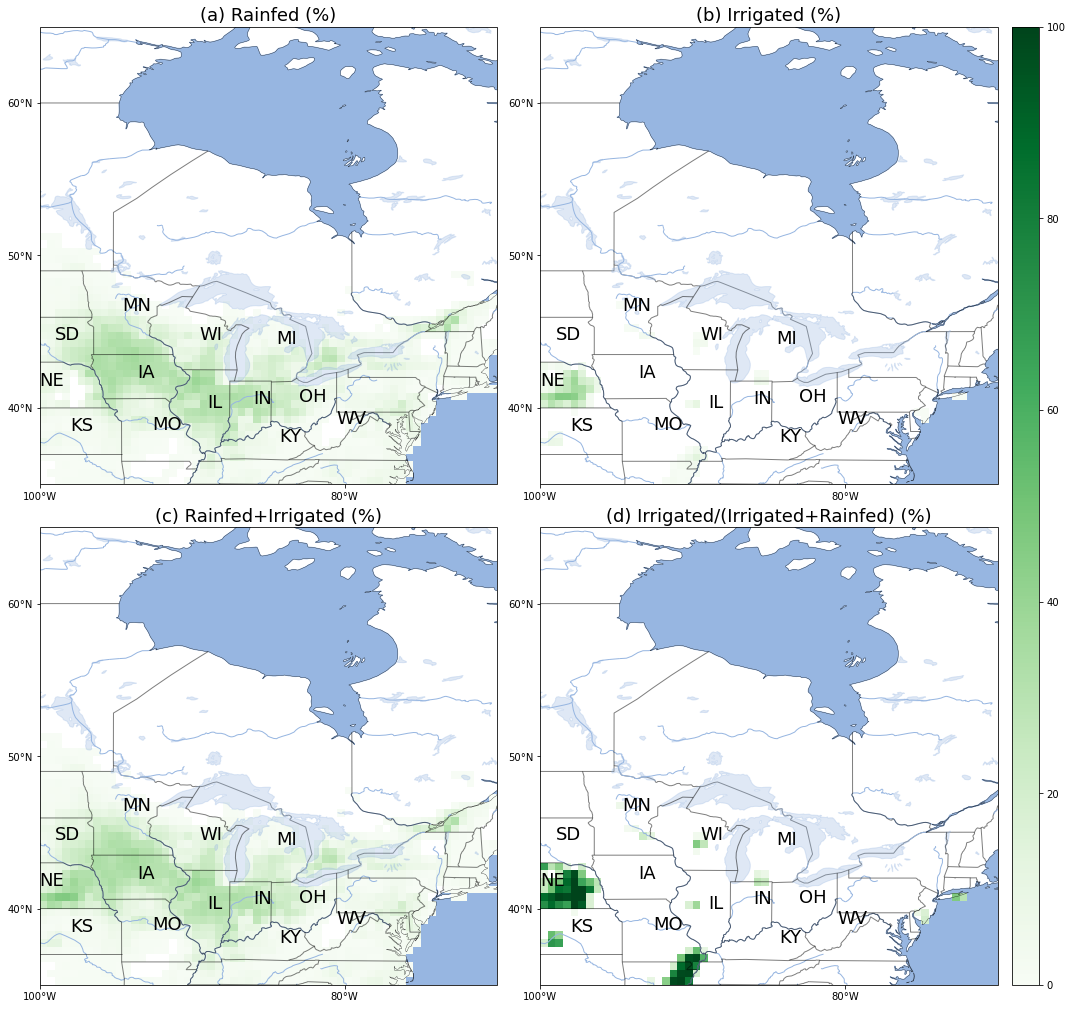

In [9]:
#use the 10-year average for the period 2005-2014
t1m = ds["maize_rainfed"].mean(dim='time')*100
t2m = ds["maize_irrigated"].mean(dim='time')*100
t3m = t1m+t2m
t4m = t2m/t3m*100
lats = t1m.coords['lat'][:]
lons = t1m.coords['lon'][:]
X,Y = np.meshgrid(lons,lats)

projection = ccrs.PlateCarree()
provinc_bodr = cartopy.feature.NaturalEarthFeature(category='cultural', 
    name='admin_1_states_provinces_lines', scale='50m', facecolor='none', edgecolor='k')

axes_class = (GeoAxes,
              dict(map_projection=projection))

# lons, lats = np.meshgrid(lons, lats)
fig = plt.figure(figsize=(15,15))
axgr = AxesGrid(fig, 111, axes_class=axes_class,
                nrows_ncols=(2, 2),
                axes_pad=0.6,
                cbar_location='right',
                cbar_mode='single',
                cbar_pad=0.2,
                cbar_size='3%',
                label_mode='')  # note the empty labe

for i, ax in enumerate(axgr):


#*************************************************************
#add ocean, coastline,borders,lakes,rivers,provinc_bodr
    if i==0:
        titletext="(a) Rainfed (%)"
        data=t1m.squeeze()
        data=np.where(data <= 0.1, np.nan, data)
    if i==1:
        titletext="(b) Irrigated (%)"
        data=t2m.squeeze()
        data=np.where(data <= 0.1, np.nan, data)
    if i==2:
        titletext="(c) Rainfed+Irrigated (%)"
        data=t3m.squeeze()
        data=np.where(data <= 0.1, np.nan, data)
    if i==3:
        titletext="(d) Irrigated/(Irrigated+Rainfed) (%)"
        data=t4m.squeeze() 
        data=np.where(data <= 0.1, np.nan, data)
    ax.add_feature(cfeature.OCEAN)
    ax.add_feature(cfeature.COASTLINE,linewidth=0.3)
    ax.add_feature(cfeature.BORDERS, linestyle='-', alpha=0.5)
    ax.add_feature(cfeature.LAKES, alpha=0.3)
    ax.add_feature(cfeature.RIVERS)
    ax.add_feature(provinc_bodr, linestyle='-', linewidth=1, edgecolor="k", zorder=10, alpha=0.5)    
    ax.set_title(titletext,fontsize=18)
    ax.set_xticks(np.linspace(-180, 180, 19), crs=projection)
    ax.set_yticks(np.linspace(-60, 60, 13), crs=projection)
    ax.set_xlim([-100,-70])
    ax.set_ylim([35,65])

    lon_formatter = LongitudeFormatter(zero_direction_label=True)
    lat_formatter = LatitudeFormatter()
    ax.xaxis.set_major_formatter(lon_formatter)
    ax.yaxis.set_major_formatter(lat_formatter)
    for iprov in range(26):
        if Longitudes[iprov]<-80 and Latitudes[iprov]<47:
            ax.text(Longitudes[iprov],Latitudes[iprov],provinces1[iprov],fontsize=18)
    p = ax.pcolormesh(X, Y, data,
                      vmin=0.0,
                      vmax=100,
                      transform=projection,
                      cmap='Greens')
axgr.cbar_axes[0].colorbar(p,ax=ax)
plt.tight_layout()
plt.show()
fig.savefig('Figure1_Maize_landuse_fraction_1995-2014.png',dpi=150)

In [10]:
## Analyse the maps

In [11]:
pc1=np.array(t1m).flatten()
r1=round(pc1[pc1>=0.1].shape[0]/pc1.shape[0]*100,2)
r2=round(pc1[pc1>5].shape[0]/pc1.shape[0]*100,2)
r3=round(pc1[pc1>10].shape[0]/pc1.shape[0]*100,2)
r4=round(pc1[pc1>20].shape[0]/pc1.shape[0]*100,2)
[r1,r2,r3,r4]

[34.22, 16.5, 11.28, 5.47]

In [12]:
pc1[pc1>0].shape[0]

1626

In [13]:
pc1[pc1>0.1].shape[0]

1232

In [14]:
pc1[pc1>0.1].max()

38.70057

### analyze the rainfed land use
Figure 1: Spatial distribution of average maize land use across a geographic grid
This figure presents the spatial distribution of maize land use as a percentage, averaged over the period 
from 2005 to 2014, using a 0.5° × 0.5° geographic grid resolution. The data is grouped into four categories: 
    (a) rainfed, (b) irrigated, (c) the combination of rainfed and irrigated, and 
    (d) the percentage of irrigated land in the combined rainfed and irrigated category.

In [15]:
pc1=np.array(t2m).flatten()
r1=round(pc1[pc1>0.1].shape[0]/pc1.shape[0]*100,2)
r2=round(pc1[pc1>5].shape[0]/pc1.shape[0]*100,2)
r3=round(pc1[pc1>10].shape[0]/pc1.shape[0]*100,2)
r4=round(pc1[pc1>20].shape[0]/pc1.shape[0]*100,2)
[r1,r2,r3,r4]

[2.39, 1.11, 0.72, 0.53]

In [16]:
# irrigated maize landuse

In [17]:
pc1=np.array(t3m).flatten()
r1=round(pc1[pc1>0.1].shape[0]/pc1.shape[0]*100,2)
r2=round(pc1[pc1>5].shape[0]/pc1.shape[0]*100,2)
r3=round(pc1[pc1>10].shape[0]/pc1.shape[0]*100,2)
r4=round(pc1[pc1>20].shape[0]/pc1.shape[0]*100,2)
[r1,r2,r3,r4]
r10=r1

In [18]:
pc1=np.array(t4m).flatten()
r1=round(pc1[pc1>0.1].shape[0]/pc1.shape[0]*100,2)
r2=round(pc1[pc1>5].shape[0]/pc1.shape[0]*100,2)
r3=round(pc1[pc1>10].shape[0]/pc1.shape[0]*100,2)
r4=round(pc1[pc1>50].shape[0]/pc1.shape[0]*100,2)
[r1,r2,r3,r4,r4/r10*100]

[2.42, 2.31, 2.14, 1.14, 3.2986111111111107]

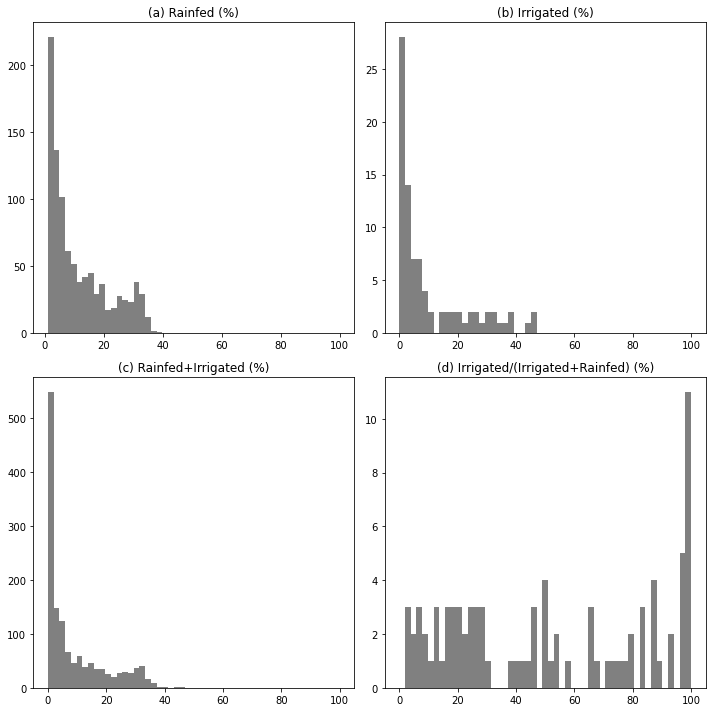

In [19]:

titletext1="(a) Rainfed (%)"
titletext2="(b) Irrigated (%)"
titletext3="(c) Rainfed+Irrigated (%)"
titletext4="(d) Irrigated/(Irrigated+Rainfed) (%)"

fig, axs = plt.subplots(2, 2,figsize=(10,10))
temp=np.array(t1m).flatten()
axs[0, 0].hist(temp,range=(1,100),bins=51,color='grey')
axs[0, 0].set_title(titletext1)
temp=np.array(t2m).flatten()
axs[0, 1].hist(temp.flatten(),range=(0.01,100),bins=51,color='grey')
axs[0, 1].set_title(titletext2)
temp=np.array(t3m).flatten()
axs[1, 0].hist(temp.flatten(),range=(0.01,100),bins=51,color='grey')
axs[1, 0].set_title(titletext3)
temp=np.array(t4m).flatten()
axs[1, 1].hist(temp.flatten(),range=(0.01,100),bins=51,color='grey')
axs[1, 1].set_title(titletext4)

fig.tight_layout()
plt.show()